In [3]:
import pandas as pd
import numpy as np
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/Users/zacharyburnside/Desktop/games.csv")


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


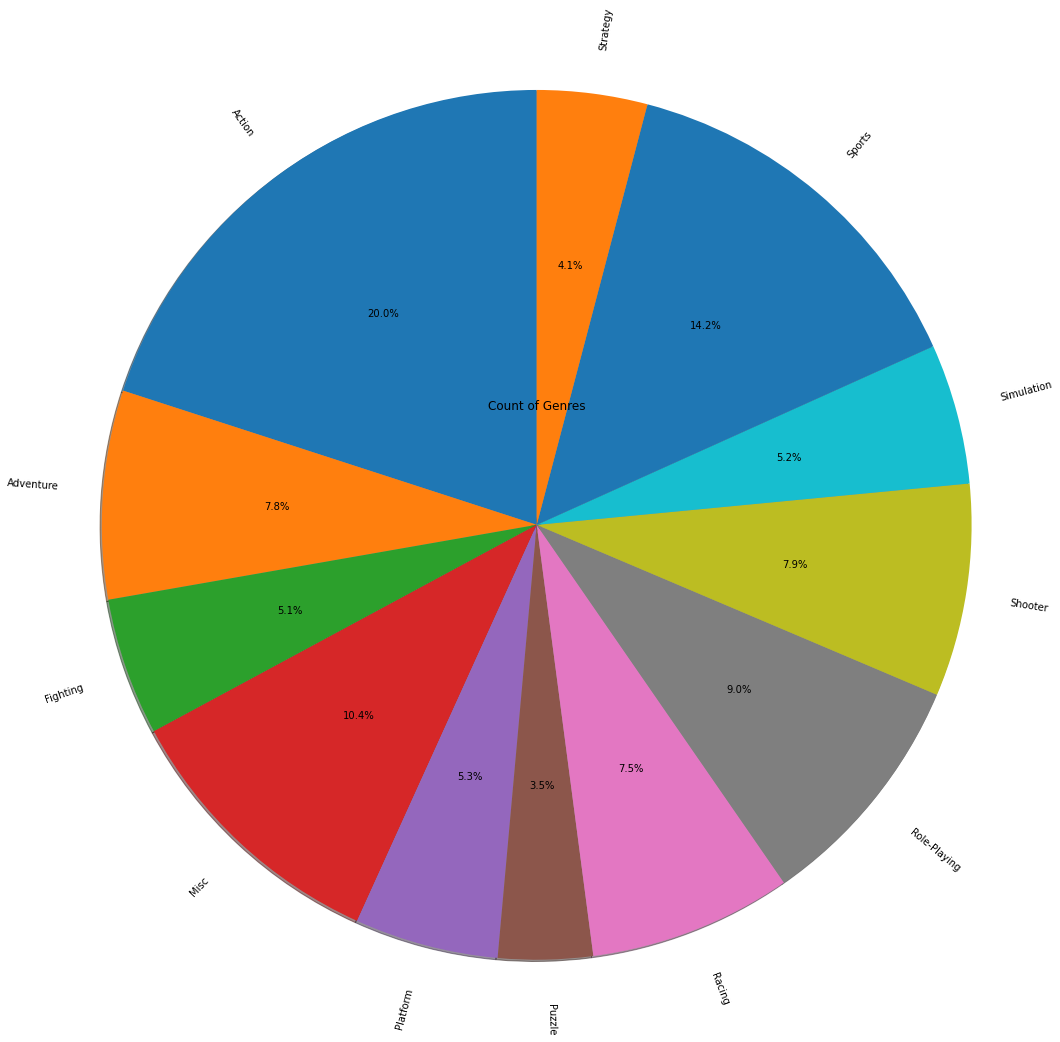

In [10]:
publisher=df.groupby('Genre')['Publisher'].count()
    
labels=publisher.index

fig1, ax1 = plt.subplots()
plt.title('Count of Genres')
ax1.pie(publisher, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=5, labeldistance=1.1, rotatelabels=True)
plt.show()

Text(0.5, 1.0, 'NA Sales Compared to Global Sales')

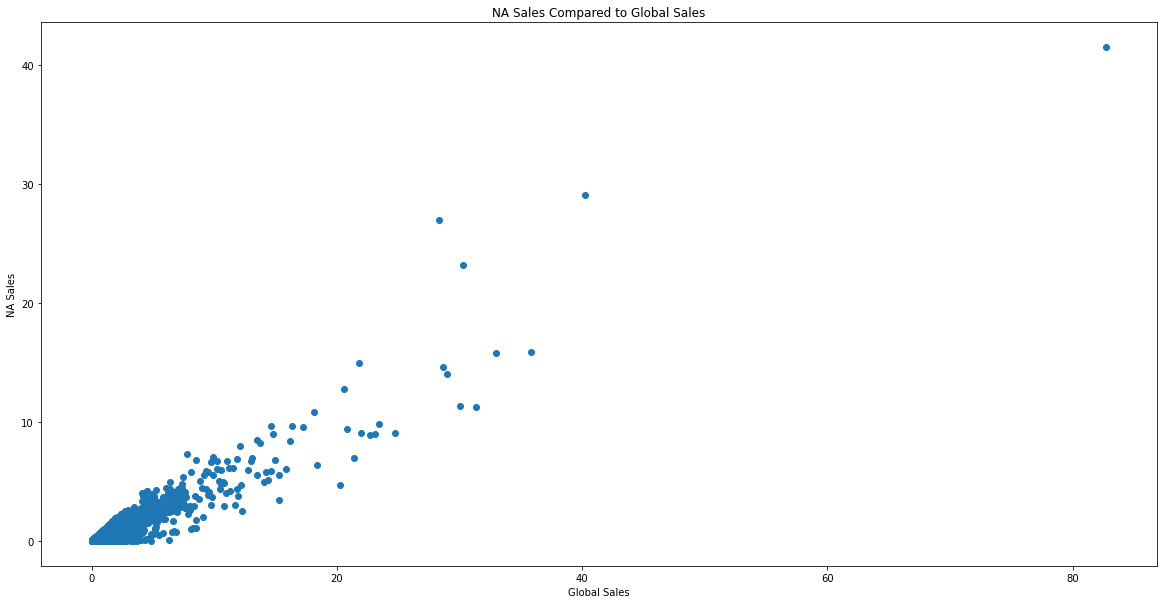

In [11]:
x=df['NA_Sales']
y=df['Global_Sales']
plt.figure(figsize=(20,10))
plt.scatter(y,x)
plt.title('Price by Square Footage')
plt.ylabel('NA Sales')
plt.xlabel('Global Sales')
plt.title('NA Sales Compared to Global Sales')

In [48]:
df.sort_values('Global_Sales', ascending = False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16189,BattleForge,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16187,16190,Jewel Quest II,PC,2007.0,Puzzle,Avanquest,0.00,0.01,0.00,0.00,0.01
16188,16191,Toro to Morimori,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16189,16192,Sonic & All-Stars Racing Transformed,PC,2013.0,Racing,Sega,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:xlabel='Number of Games', ylabel='Platform'>

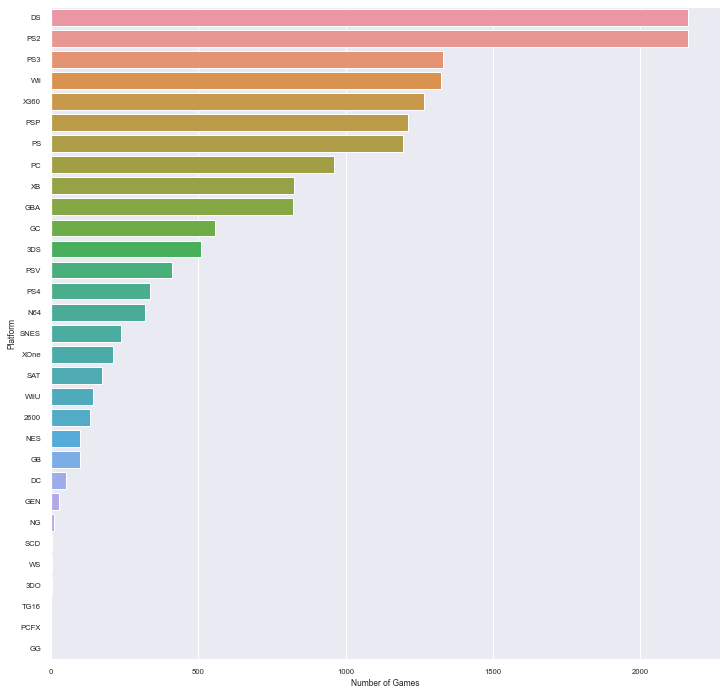

In [98]:
platform_genre = pd.crosstab(df.Platform,df.Genre)
total=platform_genre.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(12,12))
plt.ylabel('Platform')
plt.xlabel('Number of Games')
sns.barplot(y=total.index, x=total.values)

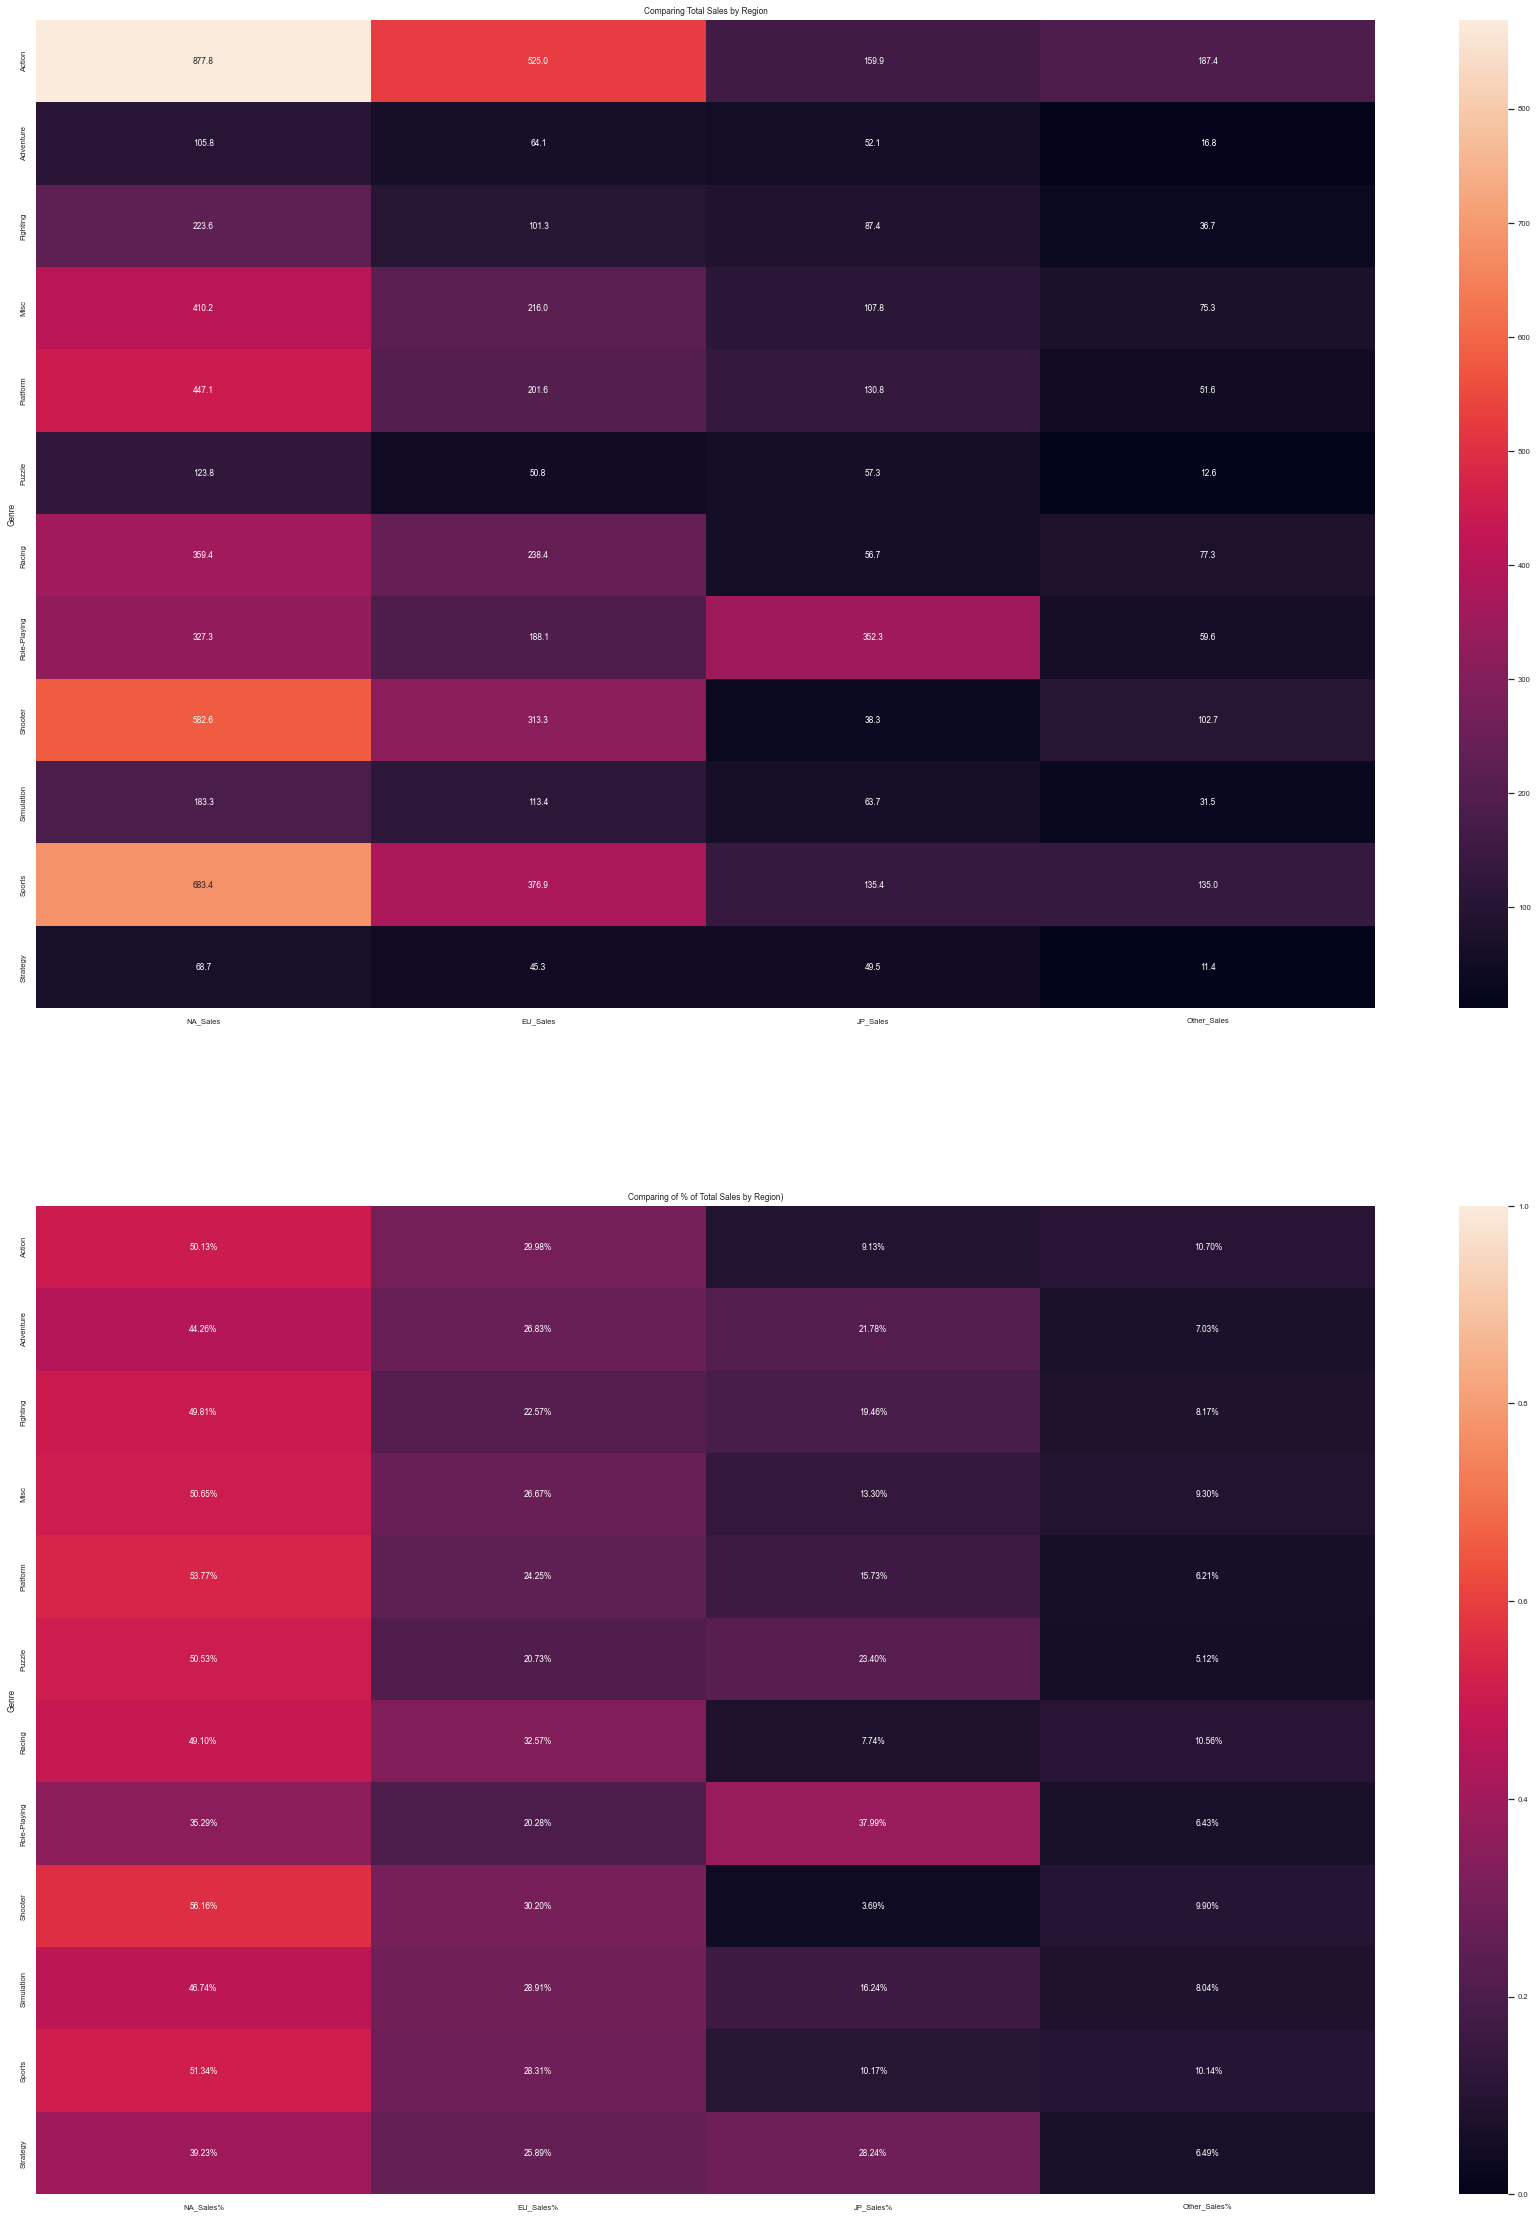

In [86]:
genre = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
#creating new columns for % of global sales
genre['NA_Sales%'] = genre['NA_Sales']/genre['Global_Sales']
genre['EU_Sales%'] = genre['EU_Sales']/genre['Global_Sales']
genre['JP_Sales%'] = genre['JP_Sales']/genre['Global_Sales']
genre['Other_Sales%'] = genre['Other_Sales']/genre['Global_Sales']

#creating heatmap plots to compare each game genre to % of sales by region
plt.figure(figsize=(30,40))
sns.set(font_scale=0.7)
plt.subplot(211)
sns.heatmap(genre.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparing Total Sales by Region")
plt.subplot(212)
sns.heatmap(genre.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%')
plt.title("Comparing of % of Total Sales by Region)")
plt.show()

Text(0.5, 0, 'Year')

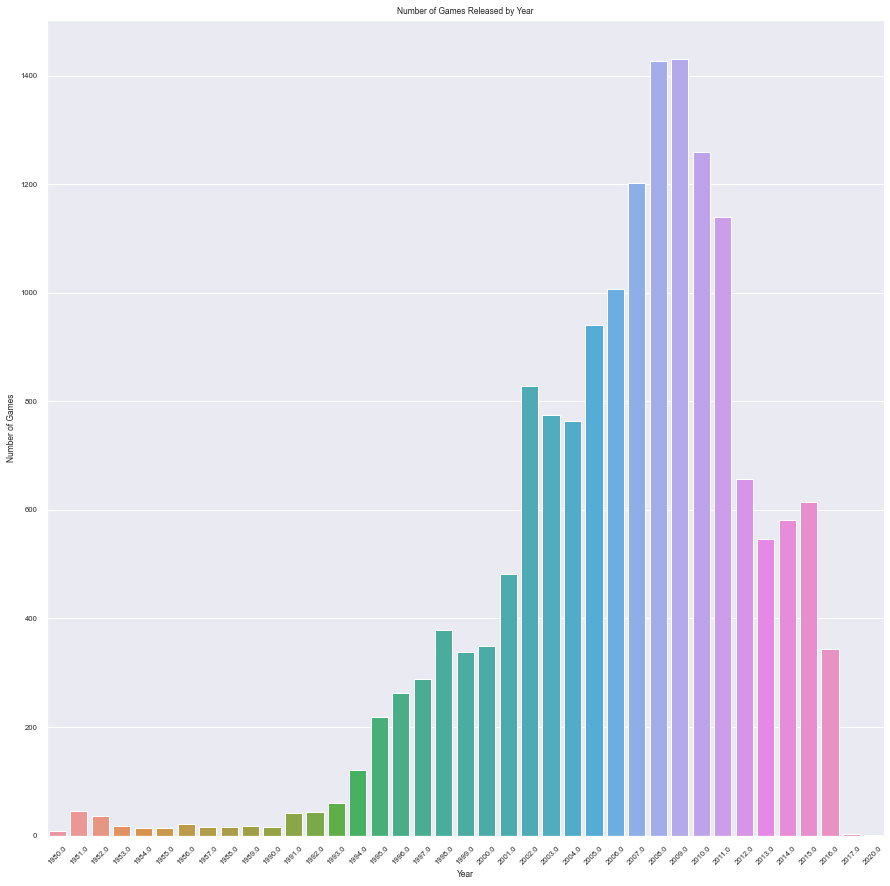

In [119]:
game_year=df.groupby('Year')['Name'].count()
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
sns.barplot(x=game_year.index, y=game_year.values)
plt.title('Number of Games Released by Year')
plt.ylabel('Number of Games')
plt.xlabel('Year')

OVERALL FINDINGS

COUNT OF GENRES

-Action has the the highest count with 20% while th lowest count is Puzzle with 3.5%

BARPLOT FINDINGS
-Nintendo DS has the most amount of games while No Good (NG) by SNK, has the least amount of games


HEATMAP FINDINGS

JP_SALES
-The most popular genre of game bought in Japan is Role-Playing games with ~38% of Global_Sales
-The leat popular genre of game bought in Japan is Shooter games with ~3.7% of Global_Sales

EU_SALES

-The most popular genre of game bought in EU is Racing games with ~32.6% of Global_Sales
-The leat popular genre of game bought in EU is Role-Playing games with ~20.3% of Global_Sales


NA_SALES
-The most popular genre of game bought in NA is Shooter games with ~56% of Global_Sales
-The leat popular genre of game bought in NA is Role-Playing games with ~35.3% of Global_Sales

OTHER_SALES

-The most popular genre of game bought in Other_Sales is Action games with ~10.70% of Global_Sales
-The leat popular genre of game bought in Other_sales is Puzzle games with ~5.12% of Global_Sales

NUMBER OF GAMES RELEASED PER YEAR

It appears the majority of video games were released from 2007-2012 where 1200+ games were released per year. Note that this data is a few years stale, so just analyzing what there is to work with 

NA COMPARED TO GLOBAL_SALES
-As NA_Sales is the greatest contributor to Global_Sales it is interesting to see the outliers here which shows some NA sales make up a very large part of Global Sales for some games. For example, Wii Sports NA_Sales makes up around 50% of Global_Sales (41.49 of 82.72)